In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio 

In [2]:
def cosd(deg):
    # cosine with argument in degrees
    return np.cos(deg * np.pi/180)

def sind(deg):
    # sine with argument in degrees
    return np.sin(deg * np.pi/180)

def tern2cart(T):
    # convert ternary data to cartesian coordinates
    sT = np.sum(T,axis = 1)
    T = 100 * T / np.tile(sT[:,None],(1,3))

    C = np.zeros((T.shape[0],2))
    C[:,1] = T[:,1]*sind(60)/100
    C[:,0] = T[:,0]/100 + C[:,1]*sind(30)/sind(60)
    return C

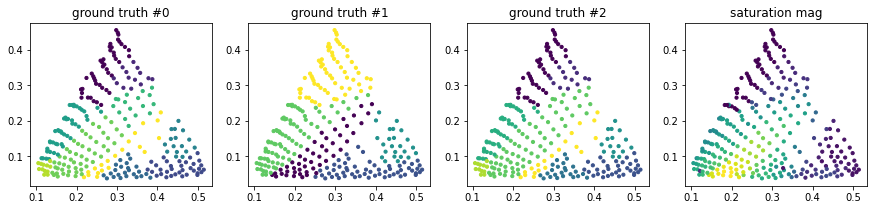

In [3]:
FGP = sio.loadmat('./FeGaPd_full_data_200817a.mat')

C = FGP['C'] # composition
XY = FGP['XY'] # XY coordinates on wafer
XRD = FGP['X'][:,631:1181] # X-ray diffraction intensities
T = FGP['T'][:,631:1181] # 2theta for the XRD intensities
labels_col = FGP['labels_col'] # ground truth labels
fp = FGP['Mag_modified']
idx = [1,2,0]
XYc = tern2cart(C[:,idx]) # convert composition to XY coordinates

# ground truths. These use different ranges of 2theta for labels.
L1 = labels_col[0][0]
L2 = labels_col[0][1]
L3 = labels_col[0][2]
L_true = np.hstack((L1,L2,L3))

plt.figure(figsize = (15,3))
for i in range(3):
    plt.subplot(1,4,i+1)
    plt.scatter(XYc[:,0], XYc[:,1], s=10, c=L_true[:,i])
    plt.title('ground truth #' + str(i))
plt.subplot(1,4,4)
plt.scatter(XYc[:,0], XYc[:,1], s=10, c=fp)
plt.title('saturation mag')
plt.show()

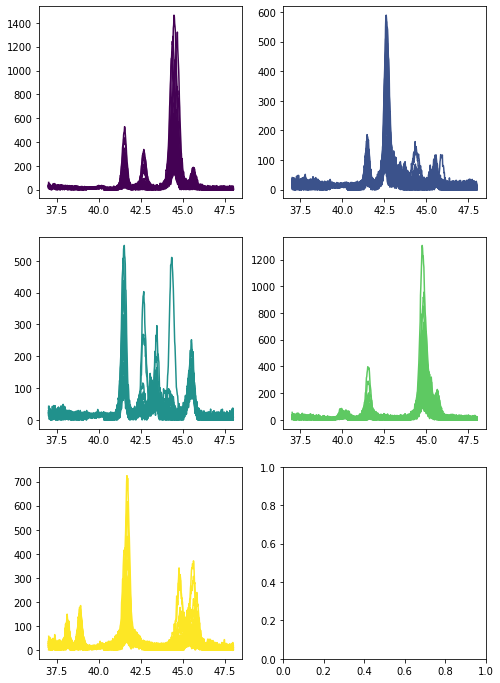

In [4]:
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize

cmap = get_cmap('viridis')
norm = Normalize(vmin=0, vmax=4)
gt1 = L_true[:,1]-1
fig, axs = plt.subplots(3,2, figsize=(4*2, 4*3))
axs = axs.flatten()
for k in np.unique(gt1):
    Mk = np.argwhere(gt1==k).squeeze()
    for cs in Mk:
        axs[k].plot(T.squeeze(), XRD[cs,:], color=cmap(norm(k)))
plt.show()